# W51CA3 2DGaussian Fitting PBCOR

#### ALMA Band 6 (1 mm = 226 GHz) continuum
`/orange/adamginsburg/w51/FITS/W51n_cont_briggsSC_tclean.image.fits`

In [75]:
directory1 = '/orange/adamginsburg/w51/FITS/W51n_cont_briggsSC_tclean.image.fits'

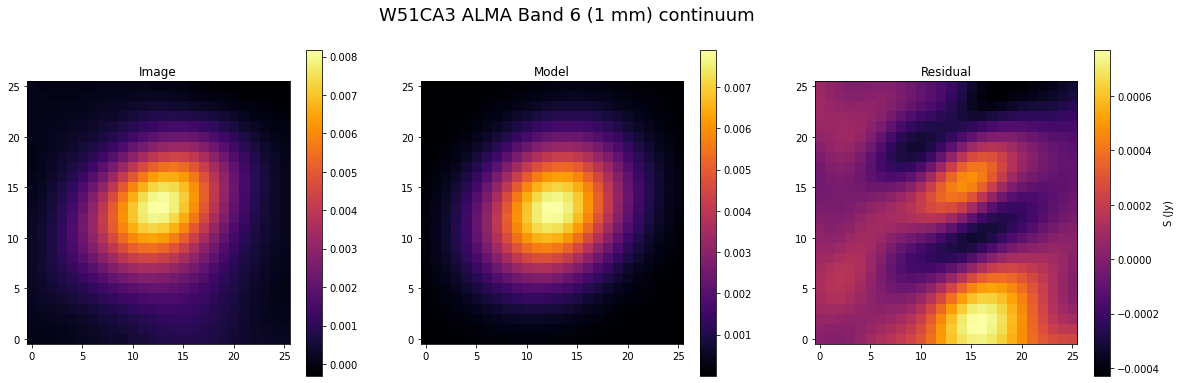

Parameter Error

7.949175317e-03 2.537724792e-04

2.90917076e+02 1.224428804e-07

1.45182376e+01 1.211903920e-07

3.577235901e-06 1.176348935e-07

4.368343544e-06 1.261432863e-07

7.855057581e-01 3.332209776e-01



In [76]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from spectral_cube import SpectralCube, Projection
from astropy.modeling import models, fitting
from astropy.convolution import convolve_models
from astropy import units as u

#Accessing Cube Data
cube = SpectralCube.read(directory1, format='fits')
cube = cube[0,:,:]
x, y = 3295, 3580
size = 13

cube_cutout = cube[y - size:y + size, x - size:x + size]
yy, xx = cube_cutout.spatial_coordinate_map

cord = cube.world[y,x]

p_init_gauss2D = models.Gaussian2D(x_mean=cord[1], y_mean=cord[0], amplitude=0.03 * (u.Jy/u.beam),
                                   x_stddev=1.111111e-5 * u.degree, y_stddev=1.111111e-5 * u.degree, theta=1.5*u.rad)

fit_p = fitting.LevMarLSQFitter()


cube_cutout_quant = cube_cutout



with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    p_gauss2D = fit_p(p_init_gauss2D, xx, yy, cube_cutout_quant)


p_init_gauss2D.theta.fixed = True

cov = np.diag(fit_p.fit_info['param_cov'])
errors = np.sqrt(cov)

amplitude_error=np.format_float_scientific(errors[0],precision=9)
x_mean_error=np.format_float_scientific(errors[1],precision=9)
y_mean_error=np.format_float_scientific(errors[2],precision=9)
x_stddev_error=np.format_float_scientific(errors[3],precision=9)
y_stddev_error=np.format_float_scientific(errors[4],precision=9)
theta_error=np.format_float_scientific(errors[5],precision=9)

amplitude = np.format_float_scientific(p_gauss2D.amplitude[0],precision=9)
x_mean = np.format_float_scientific(p_gauss2D.x_mean[0],precision=9)
y_mean = np.format_float_scientific(p_gauss2D.y_mean[0],precision=9)
x_stddev = np.format_float_scientific(p_gauss2D.x_stddev[0],precision=9)
y_stddev = np.format_float_scientific(p_gauss2D.y_stddev[0],precision=9)
#theta = np.format_float_scientific(p_gauss2D.theta[0],precision=9)

              
plt.figure(figsize=(20, 6))
plt.suptitle("W51CA3 ALMA Band 6 (1 mm) continuum", fontsize=18)

plt.subplot(1, 3, 1)
plt.title("Image")
plt.imshow(cube_cutout.value, origin='lower', cmap='inferno')
plt.colorbar()

plt.subplot(1, 3, 2)
plt.title("Model")
plt.imshow(p_gauss2D(xx, yy).value, origin='lower', cmap='inferno')
plt.colorbar()

plt.subplot(1, 3, 3)
plt.title("Residual")
plt.imshow(cube_cutout.value - p_gauss2D(xx, yy).value, origin='lower', cmap='inferno')
plt.colorbar(label='S (Jy)')

plt.show()

#saveplotfig_gaussianfit()

print("Parameter" + ' ' + 'Error' +"\n")
print(amplitude + ' ' + amplitude_error +"\n")
print(x_mean + ' ' + x_mean_error +"\n")
print(y_mean + ' ' + y_mean_error +"\n")
print(x_stddev + ' ' + x_stddev_error +"\n")
print(y_stddev + ' ' + y_stddev_error +"\n")
print(theta + ' ' + theta_error +"\n")

#### ALMA Band 3 (3mm) continuum

`/orange/adamginsburg/w51/2017.1.00293.S/may2021_successful_imaging/w51n.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt0.pbcor`




cord (cube.world[y,x]) [<Quantity 14.51823444 deg>, <Quantity 290.91707441 deg>] 

xx, yy (cube_cutout.spatial_coordinate_map) [[14.51822472 14.51822472 14.51822472 14.51822472 14.51822472 14.51822472
  14.51822472 14.51822472 14.51822472 14.51822472]
 [14.51822667 14.51822667 14.51822667 14.51822667 14.51822667 14.51822667
  14.51822667 14.51822667 14.51822667 14.51822667]
 [14.51822861 14.51822861 14.51822861 14.51822861 14.51822861 14.51822861
  14.51822861 14.51822861 14.51822861 14.51822861]
 [14.51823056 14.51823056 14.51823056 14.51823056 14.51823056 14.51823056
  14.51823056 14.51823056 14.51823056 14.51823056]
 [14.5182325  14.5182325  14.5182325  14.5182325  14.5182325  14.5182325
  14.5182325  14.5182325  14.5182325  14.5182325 ]
 [14.51823444 14.51823444 14.51823444 14.51823444 14.51823444 14.51823444
  14.51823444 14.51823444 14.51823444 14.51823444]
 [14.51823639 14.51823639 14.51823639 14.51823639 14.51823639 14.51823639
  14.51823639 14.51823639 14.51823639 14.51823639]

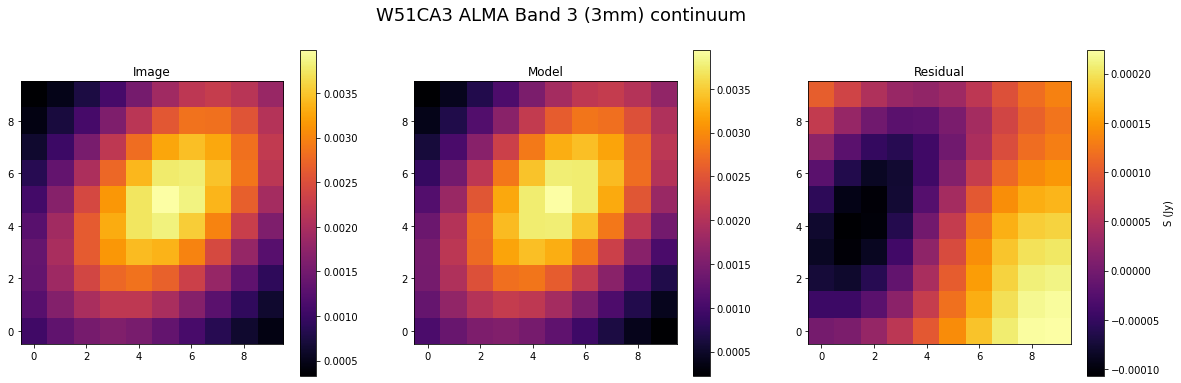

Parameter Error

3.948074055e-03 1.514946555e-04

2.909170744e+02 1.166389127e-09

1.451823444e+01 1.182527092e-09

5.278538745e-06 8.848120388e-10

8.611458028e-06 2.032825203e-09

7.853327930e-01 2.944564689e-04



In [16]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from spectral_cube import SpectralCube, Projection
from astropy.io import fits
from astropy.modeling import models, fitting
from astropy.convolution import convolve_models
from astropy import units as u

from astropy.visualization import quantity_support

sys.path.append('/orange/adamginsburg/ALMA_IMF/reduction/analysis/')
from quicklook_multicolorbar import quicklook

import pylab as pl

#Saving methods
directory1 = '/orange/adamginsburg/w51/2017.1.00293.S/may2021_successful_imaging/w51n.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt0.pbcor'

#Accessing Cube Data
cube = SpectralCube.read(directory1, format='casa_image')
cube = cube[0,:,:]
x, y = 7047, 7342
size = 5

cube_cutout = cube[y - size:y + size, x - size:x + size]
yy, xx = cube_cutout.spatial_coordinate_map

cord = cube.world[y,x]

print("cord (cube.world[y,x])", cord, '\n')
print("xx, yy (cube_cutout.spatial_coordinate_map)",yy, xx, '\n')

p_init_gauss2D = models.Gaussian2D(x_mean=cord[1], y_mean=cord[0], amplitude=1 * (u.Jy/u.beam),
                                   x_stddev=(0.019) * u.arcsec, y_stddev=(0.031) * u.arcsec, theta = (np.pi/4) * u.rad)

fit_p = fitting.LevMarLSQFitter()


cube_cutout_quant = cube_cutout

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    p_gauss2D = fit_p(p_init_gauss2D, xx, yy, cube_cutout_quant)

cov = np.diag(fit_p.fit_info['param_cov'])
errors = np.sqrt(cov)

amplitude_error=np.format_float_scientific(errors[0],precision=9)
x_mean_error=np.format_float_scientific(errors[1],precision=9)
y_mean_error=np.format_float_scientific(errors[2],precision=9)
x_stddev_error=np.format_float_scientific(errors[3],precision=9)
y_stddev_error=np.format_float_scientific(errors[4],precision=9)
theta_error=np.format_float_scientific(errors[5],precision=9)

amplitude = np.format_float_scientific(p_gauss2D.amplitude[0],precision=9)
x_mean = np.format_float_scientific(p_gauss2D.x_mean[0],precision=9)
y_mean = np.format_float_scientific(p_gauss2D.y_mean[0],precision=9)
x_stddev = np.format_float_scientific(p_gauss2D.x_stddev[0],precision=9)
y_stddev = np.format_float_scientific(p_gauss2D.y_stddev[0],precision=9)
theta = np.format_float_scientific(p_gauss2D.theta[0],precision=9)

plt.figure(figsize=(20, 6))
plt.suptitle("W51CA3 ALMA Band 3 (3mm) continuum", fontsize=18)

plt.subplot(1, 3, 1)
plt.title("Image")
plt.imshow(cube_cutout.value, origin='lower', cmap='inferno')
plt.colorbar()

plt.subplot(1, 3, 2)
plt.title("Model")
plt.imshow(p_gauss2D(xx, yy).value, origin='lower', cmap='inferno')
plt.colorbar()

plt.subplot(1, 3, 3)
plt.title("Residual")
plt.imshow(cube_cutout.value - p_gauss2D(xx, yy).value, origin='lower', cmap='inferno')
plt.colorbar(label='S (Jy)')

plt.show()

print("Parameter" + ' ' + 'Error' +"\n")
print(amplitude + ' ' + amplitude_error +"\n")
print(x_mean + ' ' + x_mean_error +"\n")
print(y_mean + ' ' + y_mean_error +"\n")
print(x_stddev + ' ' + x_stddev_error +"\n")
print(y_stddev + ' ' + y_stddev_error +"\n")
print(theta + ' ' + theta_error +"\n")

In [20]:
print(data_cutout[:,])

[[-3.3240791e-05]
 [-3.8253274e-05]
 [-1.9529241e-05]
 [ 1.5167979e-05]
 [ 4.8416423e-05]
 [ 6.6150918e-05]
 [ 6.5362430e-05]
 [ 5.2089639e-05]
 [ 3.2825148e-05]
 [ 8.5272050e-06]
 [-1.8967283e-05]
 [-3.8895683e-05]
 [-4.0655563e-05]
 [-2.9055027e-05]] Jy / beam


#### VLA Q-band (0.7 cm = 46.99 GHz) continuum
`/orange/adamginsburg/w51/vla/16B-202_W51QKa/merge/W51North_QbandAarray_cont_spws_continuum_cal_clean_2terms_robust0_wproj_selfcal16_final.image.tt0.pbcor.fits`

SIMPLE  =                    T /Standard FITS                                   BITPIX  =                  -32 /Floating point (32 bit)                         NAXIS   =                    2                                                  NAXIS1  =                 8000                                                  NAXIS2  =                 8000                                                  EXTEND  =                    T                                                  BSCALE  =   1.000000000000E+00 /PHYSICAL = PIXEL*BSCALE + BZERO                 BZERO   =   0.000000000000E+00                                                  BMAJ    =   1.371446789967E-05                                                  BMIN    =   9.800910742746E-06                                                  BPA     =  -6.664144897461E+01                                                  BTYPE   = 'Intensity'                                                           OBJECT  = '        '                    

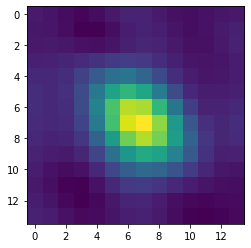

In [37]:
import matplotlib.pyplot as plt
from astropy import units as u
from astropy.io import fits
import radio_beam
from radio_beam import Beam

directory3 = '/orange/adamginsburg/w51/vla/16B-202_W51QKa/merge/W51North_QbandAarray_cont_spws_continuum_cal_clean_2terms_robust0_wproj_selfcal16_final.image.tt0.pbcor.fits'

#cube = SpectralCube.read(directory3, format='fits')
#cube[0].header

hdul = fits.open(directory3)
hdu = hdul[0]
header = hdu.header
beam = Beam.from_fits_header(header) # I think this is right but you can look i tup
data = hdu.data * u.Unit(hdu.header['BUNIT'])

plt.imshow(data, origin='lower', cmap='inferno')

x, y = 3922, 4023
size = 7
data_cutout = data[y - size:y + size, x - size:x + size]
plt.imshow(data_cutout)

print (header)

In [20]:
print(data_cutout.value)

[[-8.86052021e-06 -1.60918025e-05 -2.70658966e-05 -3.32407908e-05
  -2.63888505e-05 -9.65484378e-06  3.66693075e-06  3.17789500e-06
  -8.86695034e-06 -2.11578099e-05 -2.46991440e-05 -1.97319387e-05
  -1.29054943e-05 -9.52065147e-06]
 [-1.21648281e-05 -1.42121989e-05 -2.52991067e-05 -3.82532744e-05
  -3.93885894e-05 -2.44487564e-05 -4.50698553e-06  4.79958135e-06
  -1.90697654e-06 -1.59523897e-05 -2.39054989e-05 -1.97546960e-05
  -8.78382343e-06 -8.24499693e-07]
 [-1.01930855e-05 -8.03177500e-06 -1.14364548e-05 -1.95292414e-05
  -2.26715783e-05 -1.45950053e-05 -4.45220110e-07  8.00660655e-06
   3.66765789e-06 -9.54181542e-06 -2.04429762e-05 -2.04110020e-05
  -1.04021829e-05  8.56263853e-07]
 [-2.63652652e-07  1.00893055e-06  6.66480992e-06  1.51679787e-05
   2.65007566e-05  3.76248463e-05  4.20477663e-05  3.51508752e-05
   1.86434700e-05 -4.20936772e-07 -1.41310184e-05 -1.79644449e-05
  -1.27630774e-05 -3.78079858e-06]
 [ 1.21795929e-05  8.99322822e-06  1.92619445e-05  4.84164229e-05
  

In [5]:
from astropy.wcs import WCS

In [24]:
ww = WCS(header)
ra,dec = ww.pixel_to_world(556, 556)
print(data_cutout)

TypeError: scalar 'SkyCoord' object is not iterable.

In [41]:
directory1 = '/orange/adamginsburg/w51/vla/16B-202_W51QKa/merge/W51North_QbandAarray_cont_spws_continuum_cal_clean_2terms_robust0_wproj_selfcal16_final.image.tt0.pbcor.fits'

frame1 = fits.getdata(directory1)
frame2 = fits.getdata(directory1)

cube_channels = []
cube_channels.append(frame1)
cube_channels.append(frame2)

cube_array = np.array(cube_channels)
cube_array1 = cube_array.all
#fits.writeto('/orange/adamginsburg/w51/vla/19A-254/derod/W51North_QbandAarray_cont_spws_continuum_cal_clean_2terms_robust0_wproj_selfcal16_final.image.tt0.pbcor.ADDED.fits', cube_array)

In [45]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from spectral_cube import SpectralCube, Projection
from astropy.io import fits
from astropy.modeling import models, fitting
from astropy.convolution import convolve_models
from astropy import units as u

from astropy.visualization import quantity_support

sys.path.append('/orange/adamginsburg/ALMA_IMF/reduction/analysis/')
from quicklook_multicolorbar import quicklook

import pylab as pl

#Saving methods


#Accessing Cube Data
directory1 = frame1
cube = SpectralCube.read(directory1.any, wcs= ww, format="fits")
x, y = 3922, 4023
size = 7

cube_cutout = cube[y - size:y + size, x - size:x + size]
yy, xx = cube_cutout.spatial_coordinate_map

cord = cube.world[y,x]

p_init_gauss2D = models.Gaussian2D(x_mean=cord[1], y_mean=cord[0], amplitude=1 * (u.Jy/u.beam),
                                   x_stddev= (0.021) * u.arcsec, y_stddev=(0.026) * u.arcsec, theta = (np.pi/4) * u.rad)
#p_init_gauss2D.amplitude.fixed = True

fit_p = fitting.LevMarLSQFitter()

cube_cutout_quant = cube_cutout

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    p_gauss2D = fit_p(p_init_gauss2D, xx, yy, cube_cutout_quant)
    
cov = np.diag(fit_p.fit_info['param_cov'])
errors = np.sqrt(cov)

amplitude_error=np.format_float_scientific(errors[0],precision=9)
x_mean_error=np.format_float_scientific(errors[1],precision=9)
y_mean_error=np.format_float_scientific(errors[2],precision=9)
x_stddev_error=np.format_float_scientific(errors[3],precision=9)
y_stddev_error=np.format_float_scientific(errors[4],precision=9)
theta_error=np.format_float_scientific(errors[5],precision=9)

amplitude = np.format_float_scientific(p_gauss2D.amplitude[0],precision=9)
x_mean = np.format_float_scientific(p_gauss2D.x_mean[0],precision=9)
y_mean = np.format_float_scientific(p_gauss2D.y_mean[0],precision=9)
x_stddev = np.format_float_scientific(p_gauss2D.x_stddev[0],precision=9)
y_stddev = np.format_float_scientific(p_gauss2D.y_stddev[0],precision=9)
theta = np.format_float_scientific(p_gauss2D.theta[0],precision=9)

plt.figure(figsize=(20, 6))
plt.suptitle("W51CA3 VLA Q-band (0.7 cm) continuum",fontsize = 18)

plt.subplot(1, 3, 1)
plt.title("Image")
plt.imshow(cube_cutout.value, origin='lower', cmap='inferno')
plt.colorbar()

plt.subplot(1, 3, 2)
plt.title("Model")
plt.imshow(p_gauss2D(xx, yy).value, origin='lower', cmap='inferno')
plt.colorbar()

plt.subplot(1, 3, 3)
plt.title("Residual")
plt.imshow(cube_cutout.value - p_gauss2D(xx, yy).value, origin='lower', cmap='inferno')
plt.colorbar(label='S (Jy)')

plt.show()

print("Parameter" + ' ' + 'Error' +"\n")
print(amplitude + ' ' + amplitude_error +"\n")
print(x_mean + ' ' + x_mean_error +"\n")
print(y_mean + ' ' + y_mean_error +"\n")
print(x_stddev + ' ' + x_stddev_error +"\n")
print(y_stddev + ' ' + y_stddev_error +"\n")
print(theta + ' ' + theta_error +"\n")

OSError: File-like object does not have a 'write' method, required for mode 'ostream'.

## FK5 ICRS Conversion

In [87]:
from astropy import coordinates, units as u

coordinates.SkyCoord('19:23:45.05','17:30:30', unit=(u.hour, u.deg), frame='fk5').fk5

<SkyCoord (FK5: equinox=J2000.000): (ra, dec) in deg
    (290.93770833, 17.50833333)>

In [89]:
from astropy import coordinates, units as u

coordinates.SkyCoord('19:23:45.05','17:30:30', unit=(u.hour, u.deg), frame='fk5').icrs

<SkyCoord (ICRS): (ra, dec) in deg
    (290.93770209, 17.50832727)>

#### Finding the Coordinate System for Each FITS

In [92]:
directory1 = '/orange/adamginsburg/w51/FITS/W51n_cont_briggsSC_tclean.image.fits'
directory2 = '/orange/adamginsburg/w51/2017.1.00293.S/may2021_imaging/w51n.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt0'
directory3 = '/orange/adamginsburg/w51/vla/16B-202_W51QKa/merge/W51North_QbandAarray_cont_spws_continuum_cal_clean_2terms_robust0_wproj_selfcal16_final.image.tt0'

ALMA_Band_6_cube = SpectralCube.read(directory1, format='casa_image')
ALMA_Band_3_cube = SpectralCube.read(directory2, format='casa_image')
VLA_QBand_cube   = SpectralCube.read(directory3, format='casa_image')

NotADirectoryError: [Errno 20] Not a directory: '/orange/adamginsburg/w51/FITS/W51n_cont_briggsSC_tclean.image.fits/table.f0'